In [1]:
# All the imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import seaborn as sns
sns.set_theme(style='darkgrid')

import os, random, datetime
import requests, json
import wget, zipfile


In [23]:
# Lat Lon for Dhanal Kalan Akal Academy
lat, lon = 31.262328, 75.559109
# Date strings in YYYYMMDD format
start_date = '20100101'
end_date = '20200928'
filetype = 'CSV'

# API access for NASA POWER Data via 
# https://power.larc.nasa.gov/data-access-viewer/
url = 'https://power.larc.nasa.gov/cgi-bin/v1/DataAccess.py?&request=execute&identifier=SinglePoint'

# Get all the Solar, Moisture, and Temperature related metrics that are available DAILY
url += '&parameters=PRECTOT,QV2M,RH2M,PS,T2M_RANGE,TS,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M,KT,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DWN'
# Start & End dates for DAILY data
url += '&startDate={}&endDate={}'.format(start_date, end_date)
# Misc
url += '&userCommunity=SSE&tempAverage=DAILY&outputList={}'.format(filetype)
# Lat & Lon
url += '&lat={}&lon={}'.format(lat,lon)


try: 
    response = requests.request("GET", url)
    response.raise_for_status()
    json_response = response.json()
    
except Exception as err:
    print('Something went wrong: {err}')


In [24]:
json_response.keys()

dict_keys(['features', 'header', 'messages', 'outputs', 'parameterInformation', 'time', 'type'])

In [33]:
csv_url = json_response['outputs']['csv']
DOWNLOAD_FOLDER = '/storage/solar/data'

csv_path = wget.download(csv_url, os.path.join(DOWNLOAD_FOLDER))


In [47]:
df_header = pd.read_csv(csv_path, nrows=22)
print(df_header.values)

[['NASA/POWER SRB/FLASHFlux/MERRA2/GEOS 5.12.4 (FP-IT) 0.5 x 0.5 Degree Daily Averaged Data ']
 ['Dates (month/day/year): 01/01/2010 through 09/27/2020 ']
 ['Location: Latitude  31.2623   Longitude 75.5591 ']
 ['Elevation from MERRA-2: Average for 1/2x1/2 degree lat/lon region = 289.24 meters   Site = na ']
 ['Climate zone: na (reference Briggs et al: http://www.energycodes.gov) ']
 ['Value for missing model data cannot be computed or out of model availability range: -999 ']
 ['Parameter(s): ']
 ['T2M MERRA2 1/2x1/2 Temperature at 2 Meters (C) ']
 ['RH2M MERRA2 1/2x1/2 Relative Humidity at 2 Meters (%) ']
 ['PS MERRA2 1/2x1/2 Surface Pressure (kPa) ']
 ['T2M_MAX MERRA2 1/2x1/2 Maximum Temperature at 2 Meters (C) ']
 ['CLRSKY_SFC_SW_DWN SRB/FLASHFlux 1/2x1/2 Clear Sky Insolation Incident on a Horizontal Surface (kW-hr/m^2/day) ']
 ['PRECTOT MERRA2 1/2x1/2 Precipitation (mm day-1) ']
 ['T2MDEW MERRA2 1/2x1/2 Dew/Frost Point at 2 Meters (C) ']
 ['T2M_RANGE MERRA2 1/2x1/2 Temperature Range

In [136]:
df = pd.read_csv(csv_path, skiprows=23, na_values='-999', parse_dates=[['YEAR','MO','DY']], keep_date_col=True)
df = df.rename(columns={'YEAR_MO_DY':'date'}).set_index('date')
df['day'] = df.MO + df.DY
df.head()

,LAT,LON,YEAR,MO,DY,PRECTOT,QV2M,RH2M,PS,T2M_RANGE,TS,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M,KT,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DWN,day
date,,,,,,,,,,,,,,,,,,,,
2010-01-01,31.26234,75.55912,2010,01,01,0.00,2.96,31.46,98.25,15.50,10.35,-3.66,-3.48,22.04,6.54,12.83,0.66,3.71,3.55,0101
2010-01-02,31.26234,75.55912,2010,01,02,0.00,2.91,28.69,98.46,13.48,10.37,-3.83,-3.63,22.00,8.52,14.03,0.35,NaN,1.87,0102
2010-01-03,31.26234,75.55912,2010,01,03,4.54,3.82,42.60,98.52,11.58,10.07,-0.44,-0.35,19.76,8.18,12.16,0.20,NaN,1.07,0103
2010-01-04,31.26234,75.55912,2010,01,04,0.06,4.63,57.35,98.36,14.26,10.16,2.42,2.44,18.84,4.58,10.53,0.45,NaN,2.44,0104
2010-01-05,31.26234,75.55912,2010,01,05,0.00,3.85,47.00,98.01,17.04,9.60,-0.17,-0.11,20.18,3.14,10.70,0.55,3.79,2.94,0105


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3923 entries, 2010-01-01 to 2020-09-27
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LAT                3923 non-null   float64
 1   LON                3923 non-null   float64
 2   YEAR               3923 non-null   object 
 3   MO                 3923 non-null   object 
 4   DY                 3923 non-null   object 
 5   PRECTOT            3921 non-null   float64
 6   QV2M               3921 non-null   float64
 7   RH2M               3921 non-null   float64
 8   PS                 3921 non-null   float64
 9   T2M_RANGE          3921 non-null   float64
 10  TS                 3921 non-null   float64
 11  T2MDEW             3921 non-null   float64
 12  T2MWET             3921 non-null   float64
 13  T2M_MAX            3921 non-null   float64
 14  T2M_MIN            3921 non-null   float64
 15  T2M                3921 non-null   float64
 16  KT    

In [125]:
df.isna().sum()

date                    0
LAT                     0
LON                     0
YEAR                    0
MO                      0
DY                      0
PRECTOT                 2
QV2M                    2
RH2M                    2
PS                      2
T2M_RANGE               2
TS                      2
T2MDEW                  2
T2MWET                  2
T2M_MAX                 2
T2M_MIN                 2
T2M                     2
KT                     21
CLRSKY_SFC_SW_DWN    2088
ALLSKY_SFC_SW_DWN      19
dtype: int64

In [126]:
df.describe()

,LAT,LON,PRECTOT,QV2M,RH2M,PS,T2M_RANGE,TS,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M,KT,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DWN
count,3923.00000,3.923000e+03,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3902.000000,1835.000000,3904.000000
mean,31.26234,7.555912e+01,2.422663,9.797243,45.464887,97.467896,12.682808,24.719074,10.956700,11.014234,31.766093,19.083300,24.861857,0.564933,5.521880,4.911588
std,0.00000,1.421267e-14,6.524251,5.622171,17.930040,0.702091,3.267001,9.269131,8.852246,8.856629,7.635183,7.914421,8.114602,0.136620,1.440254,1.697636
min,31.26234,7.555912e+01,0.000000,1.750000,6.430000,95.780000,2.930000,5.010000,-10.020000,-9.300000,11.950000,0.160000,6.840000,0.040000,3.210000,0.210000
25%,31.26234,7.555912e+01,0.000000,5.180000,32.650000,96.850000,10.420000,16.070000,3.860000,3.880000,25.520000,11.810000,17.500000,0.520000,4.150000,3.630000
50%,31.26234,7.555912e+01,0.020000,7.890000,42.970000,97.510000,13.010000,26.510000,9.980000,9.960000,32.660000,20.580000,26.650000,0.620000,5.530000,5.015000
75%,31.26234,7.555912e+01,1.430000,14.290000,58.950000,98.090000,14.990000,32.200000,19.040000,19.300000,37.410000,26.170000,31.360000,0.650000,6.920000,6.300000
max,31.26234,7.555912e+01,103.210000,22.960000,92.820000,98.990000,22.220000,42.750000,26.810000,26.830000,48.270000,35.180000,40.460000,0.740000,8.230000,8.230000


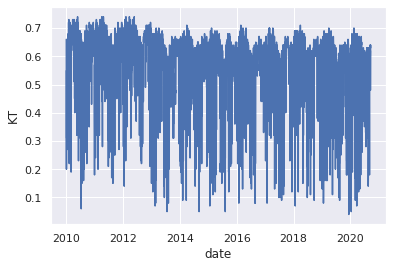

In [141]:

sns.lineplot(x='date', y='KT', data=df)
plt.show()

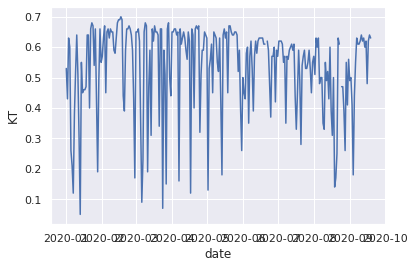

In [146]:

sns.lineplot(x='date', y='KT', data=df.loc['2020':])
plt.show()